In [23]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import mail_sender as ms
import charts as cr
tickers ={'jpy': 'JPY%3DX',
        'eur': 'EURUSD%3DX',
        'gbp': 'GBPUSD%3DX',
        'franc': 'CHFUSD%3DX',
        'us100': 'NQ%3DF',
        'us30': 'YM%3DF',
        'us500': 'ES%3DF',
        'crude oil': 'CL%3DF',
        'gold': 'GC%3DF',
        'bitcoin': 'BTC-USD',
        'Apple': 'AAPL',
        'Microsoft': 'MSFT',
        'Google': 'GOOGL',
        'Amazon': 'AMZN',
        'NVIDIA': 'NVDA',
        'Berkshire': 'BRK-B',
        'Meta': 'META',
        'Tesla': 'TSLA'
    }
#import charts as cr
#cr.stoc('Apple',21)

def get_asset_df(asset_name):
    # asset_name=lower(asset_name)
    asset_map = {
        'jpy': 'JPY%3DX',
        'eur': 'EURUSD%3DX',
        'gbp': 'GBPUSD%3DX',
        'franc': 'CHFUSD%3DX',
        'us100': 'NQ%3DF',
        'us30': 'YM%3DF',
        'us500': 'ES%3DF',
        'crude oil': 'CL%3DF',
        'gold': 'GC%3DF',
        'bitcoin': 'BTC-USD',
        'Apple': 'AAPL',
        'Microsoft': 'MSFT',
        'Google': 'GOOGL',
        'Amazon': 'AMZN',
        'NVIDIA': 'NVDA',
        'Berkshire': 'BRK-B',
        'Meta': 'META',
        'Tesla': 'TSLA',
        'UGI': 'UNH',
        'Exxon': 'XOM',
        'Johnson&Johnson': 'JNJ',
        'Visa': 'V',
        'Procter&Gamble': 'PG',
        'JPMorgan': 'JPM',
        'Mastercard': 'MA',
        'EliLilly': 'LLY',
        'Chevron': 'CVX',
        'HomeDepot': 'HD',
        'Pfizer': 'PFE',
        'AbbVie': 'ABBV',
        'Merck': 'MRK',
        'Pepsi.': 'PEP',
        'Coca-Cola': 'KO',
        'Broadcom': 'AVGO',
        'Costco': 'COST',
        'WaltDisney': 'DIS',
        'Comcast': 'CMCSA',
        'Cisco': 'CSCO',
        'Intel': 'INTC',
        'Salesforce': 'CRM',
        'TexasInstruments ': 'TXN',
        'ThermoFisher ': 'TMO',
        'Bristol-Myers Squibb': 'BMY',
        'Verizon': 'VZ',
        'Nike': 'NKE',
        'Oracle': 'ORCL',
        'NextEra Energy': 'NEE',
        'McDonald ': 'MCD',
        'Adobe': 'ADBE',
        'PhilipMorris ': 'PM',
        'AT&T': 'T',
        'AbbottLaboratories': 'ABT',
        'AdvancedMicro': 'AMD',
        'UnionPacific': 'UNP',
        'Medtronic': 'MDT',
        'CVSHealth': 'CVS',
        'Qualcomm': 'QCOM',
        'Honeywell': 'HON',
        'GoldmanSachs ': 'GS'
    }
    
    if asset_name not in asset_map:
        raise ValueError(f"Asset '{asset_name}' not recognized. Available options are: {', '.join(asset_map.keys())}")
    
    ticker = asset_map[asset_name]
    
    df = yf.download(ticker, start='2000-01-01', end=(datetime.now()+timedelta(days=1)), interval='1d')
    df.columns = df.columns.str.lower()
    columns_to_drop = ['stock splits', 'dividends']
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    if columns_to_drop:
        df.drop(columns_to_drop, axis=1, inplace=True)
    df = df.reset_index(level=0)
    df.columns = df.columns.str.lower()
    df['date'] = df['date'].dt.tz_localize('UTC')  
    df['date'] = df['date'].dt.tz_convert(None)
    
    return df

bbands_list = []

for ticker in tickers.keys():
    # print(ticker)
    df = get_asset_df(ticker)
    df.ta.bbands(length=14, append=True)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    
    percent = 0.02
    df['supply_level'] = df['BBU_14_2.0'] - df['BBU_14_2.0'].iloc[-1] * percent
    df['demand_level'] = df['BBL_14_2.0'] + df['BBL_14_2.0'].iloc[-1] * percent
    
    if datetime.now().weekday() != 0:
        df = df[((df['supply_level'] < df['close']) | (df['demand_level'] > df['close'])) &
                (df['date'].dt.date == datetime.now().date() - timedelta(days=1))]
    else:
        df = df[((df['supply_level'] < df['close']) | (df['demand_level'] > df['close'])) &
                (df['date'].dt.date == datetime.now().date() - timedelta(days=3))]
    
    if df.empty:
        continue  
    
    flag = None
    if df['close'].iloc[0] > df['supply_level'].iloc[0]:
        flag = 'overbought'
    elif df['close'].iloc[0] < df['demand_level'].iloc[0]:
        flag = 'oversold'
    
    price = df['close'].iloc[0]
    
    # Create dictionary and append to list
    bbands_dict = {
        'ticker': ticker,
        'status': flag,
        'price': price
    }
    bbands_list.append(bbands_dict)

df=pd.DataFrame(bbands_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [24]:
df

,ticker,status,price
0,jpy,overbought,156.468002
1,eur,oversold,1.053008
2,gbp,oversold,1.266785
3,franc,oversold,1.123040
4,crude oil,oversold,67.019997
5,gold,oversold,2565.699951
6,Berkshire,overbought,470.279999
7,Meta,oversold,554.080017


In [26]:
for ticker in tickers.keys():
    print(ticker)

jpy
eur
gbp
franc
us100
us30
us500
crude oil
gold
bitcoin
Apple
Microsoft
Google
Amazon
NVIDIA
Berkshire
Meta
Tesla


[*********************100%***********************]  1 of 1 completed


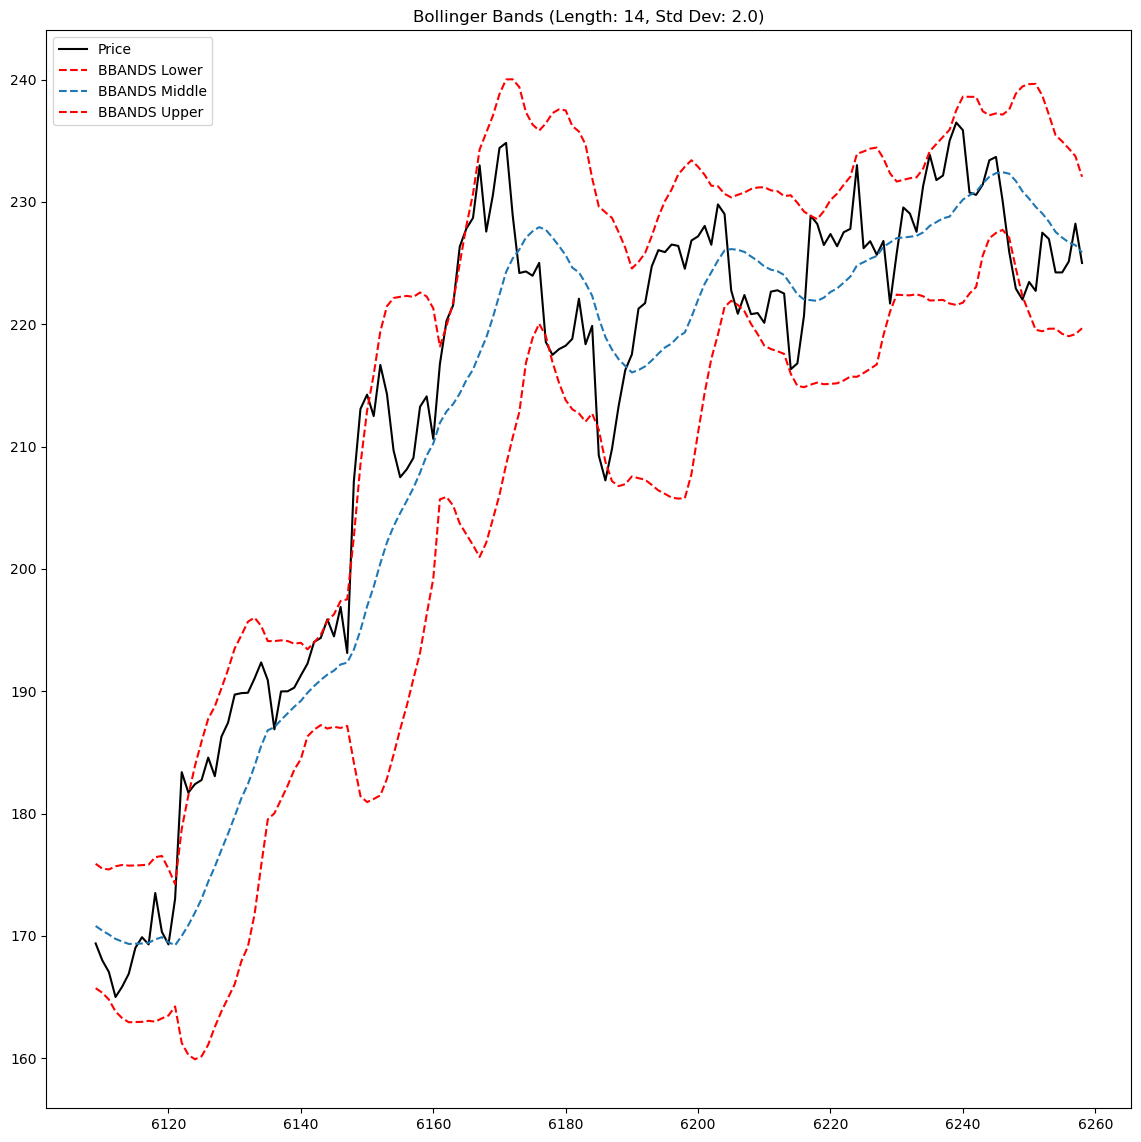

In [31]:
cr.bbands('Apple',14)

In [3]:
rows = ""
for _, row in df.iterrows():
    color = "red" if row['status'] == "overbought" else "green" if row['status'] == "oversold" else "white"
    rows += f"""
    <tr style="background-color: {color};">
        <td>{row['ticker']}</td>
        <td>{row['status']}</td>
        <td>{row['price']}</td>
    </tr>
    """

# Complete HTML body with inline styles and the table
html_body = f'''
<html>
<head>
<style>
    table {{
        width: 100%;
        border-collapse: separate;
        border-spacing: 0;
        font-size: 14px;
    }}
    th, td {{
        padding: 8px;
        text-align: left;
        white-space: nowrap;
    }}
    th {{
        background-color: #4CAF50;
        color: white;
    }}
    tr {{
        border-bottom: 1px solid #ddd;
    }}
    tr:last-child {{
        border-bottom: none;
    }}
</style>
</head>
<body>
    <h3>Economic Data Releases</h3>
    <table border="0">
        <thead>
            <tr>
                <th>Ticker</th>
                <th>Status</th>
                <th>Price</th>
            </tr>
        </thead>
        <tbody>
            {rows}
        </tbody>
    </table>
</body>
</html>
'''

subject = "Price levels with bbands"
receiver_email = "aliyevtural142002@gmail.com"  
ms.send_email(receiver_email, subject, html_body)

Email sent successfully!


In [18]:
df = get_asset_df('us100')
df.ta.bbands(length=14, append=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)

percent = 0.05
df['supply_level'] = df['BBU_14_2.0'] - df['BBU_14_2.0'].iloc[-1] * percent
df['demand_level'] = df['BBL_14_2.0'] + df['BBL_14_2.0'].iloc[-1] * percent

# if datetime.now().weekday() != 0:
#     df = df[((df['supply_level'] < df['close']) | (df['demand_level'] > df['close'])) &
#             (df['date'].dt.date == datetime.now().date() - timedelta(days=1))]
# else:
#     df = df[((df['supply_level'] < df['close']) | (df['demand_level'] > df['close'])) &
#             (df['date'].dt.date == datetime.now().date() - timedelta(days=3))]

# if df.empty:
#     continue  

# flag = None
# if df['close'].iloc[0] > df['supply_level'].iloc[0]:
#     flag = 'overbought'
# elif df['close'].iloc[0] < df['demand_level'].iloc[0]:
#     flag = 'oversold'

# price = df['close'].iloc[0]

# # Create dictionary and append to list
# bbands_dict = {
#     'ticker': ticker,
#     'status': flag,
#     'price': price
# }
# bbands_list.append(bbands_dict)

# df=pd.DataFrame(bbands_list)

[*********************100%***********************]  1 of 1 completed
